In [1]:
import sys
sys.path.append('../src')

from models.ViTL16Model.train import train as train_ViTL16Model

from utils.show_graph import plot_history

d:\repo\tkser\technopro-food-package\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
package_model_path, loss_history, auc_history = train_ViTL16Model(
    num_epochs=20,
    learning_rate=1e-05,
    lr_min=1e-06,
    batch_size=4,
    flozen=True,
    seed=110
)

d:\repo\tkser\technopro-food-package\.venv\Lib\site-packages\albumentations\augmentations\dropout\cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(
[DEBUG] 2023-09-24 02:47:03 - Using device: cuda(NVIDIA GeForce RTX 3080)
[DEBUG] 2023-09-24 02:47:03 - Starting training on cuda at 2023-09-24 02:47:03
[DEBUG] 2023-09-24 02:47:03 - Model: VisionTransformer
[DEBUG] 2023-09-24 02:47:03 - Model parameters:
[DEBUG] 2023-09-24 02:47:03 - cls_token: torch.Size([1, 1, 1024])
[DEBUG] 2023-09-24 02:47:03 - pos_embed: torch.Size([1, 577, 1024])
[DEBUG] 2023-09-24 02:47:03 - patch_embed.proj.weight: torch.Size([1024, 3, 16, 16])
[DEBUG] 2023-09-24 02:47:03 - patch_embed.proj.bias: torch.Size([1024])
[DEBUG] 2023-09-24 02:47:03 - blocks.0.norm1.weight: torch.Size([1024])
[DEBUG] 2023-09-24 02:47:03 - blocks.0.norm1.bias: torch.Size([1024])
[DEBUG] 2023-09-24 02:47:03 - blocks.0.attn.qkv.weight: torch.Size([3072, 1024])
[DEBUG] 2023-09-24 02:47:03 - blo

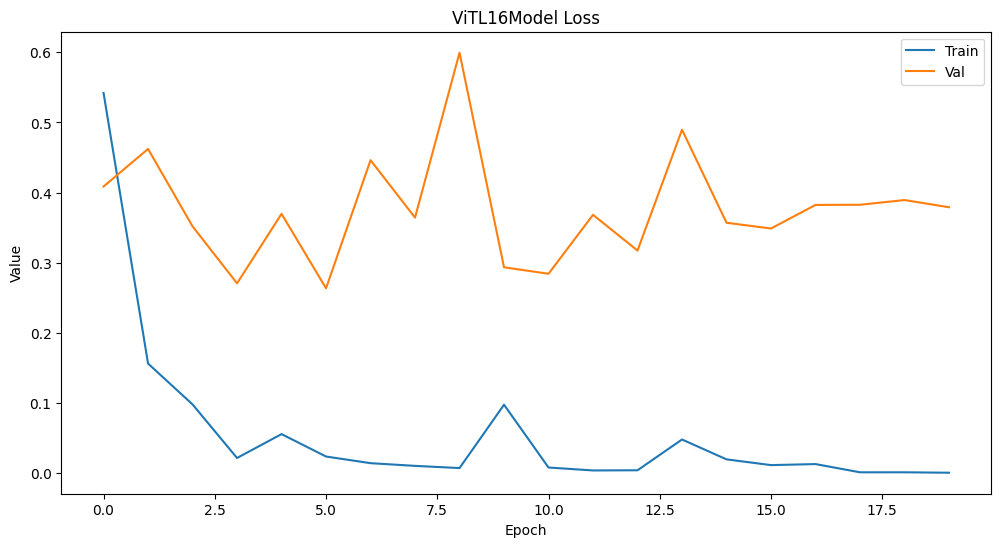

In [3]:
plot_history(loss_history, "ViTL16Model Loss")

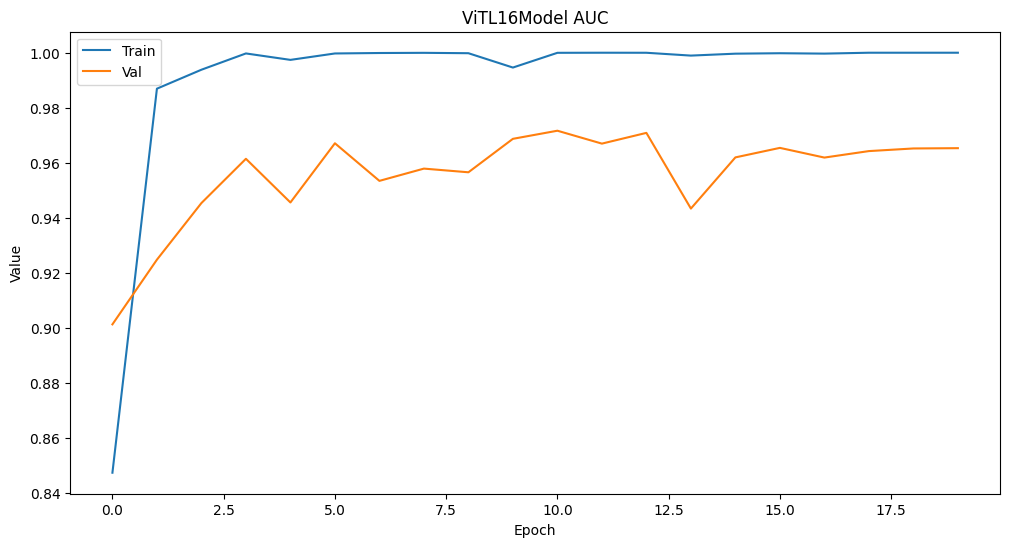

In [4]:
plot_history(auc_history, "ViTL16Model AUC")

In [5]:
from models.ViTL16Model.predict import predict as predict_ViTL16Model
import pandas as pd

sample_submission = pd.read_csv("../src/data/input/sample_submit.csv", header=None, names=['image_name', 'label'])
sample_submission.drop('label', axis=1, inplace=True)

bast_auc_vitl16_model_paths = [
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model/visiontransformer_20230917010622_epoch_60_auc_0.8502.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model/visiontransformer_20230917010622_epoch_70_auc_0.8533.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model/visiontransformer_20230917010622_epoch_50_auc_0.8460.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model/visiontransformer_20230917010622_epoch_25_auc_0.8303.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model/visiontransformer_20230917010622_epoch_12_auc_0.8110.pth"
]
for index, best_auc_model_path in enumerate(bast_auc_vitl16_model_paths):
  _, y_pred = predict_ViTL16Model(
      model_path=best_auc_model_path,
      batch_size=4,
      seed=2023,
      use_tta=False
  )
  sample_submission[f'model_vitl16_{index}_2023'] = y_pred

sample_submission['label'] = sample_submission.iloc[:, 1:].mean(axis=1)

sample_submission.drop(sample_submission.columns[1:-1], axis=1, inplace=True)

sample_submission.to_csv('../src/data/output/submit_ensemble_202309182129_vitl16_12-70range.csv', index=False, header=False)

RuntimeError: Error(s) in loading state_dict for VisionTransformer:
	Missing key(s) in state_dict: "cls_token", "pos_embed", "patch_embed.proj.weight", "patch_embed.proj.bias", "blocks.0.norm1.weight", "blocks.0.norm1.bias", "blocks.0.attn.qkv.weight", "blocks.0.attn.qkv.bias", "blocks.0.attn.proj.weight", "blocks.0.attn.proj.bias", "blocks.0.norm2.weight", "blocks.0.norm2.bias", "blocks.0.mlp.fc1.weight", "blocks.0.mlp.fc1.bias", "blocks.0.mlp.fc2.weight", "blocks.0.mlp.fc2.bias", "blocks.1.norm1.weight", "blocks.1.norm1.bias", "blocks.1.attn.qkv.weight", "blocks.1.attn.qkv.bias", "blocks.1.attn.proj.weight", "blocks.1.attn.proj.bias", "blocks.1.norm2.weight", "blocks.1.norm2.bias", "blocks.1.mlp.fc1.weight", "blocks.1.mlp.fc1.bias", "blocks.1.mlp.fc2.weight", "blocks.1.mlp.fc2.bias", "blocks.2.norm1.weight", "blocks.2.norm1.bias", "blocks.2.attn.qkv.weight", "blocks.2.attn.qkv.bias", "blocks.2.attn.proj.weight", "blocks.2.attn.proj.bias", "blocks.2.norm2.weight", "blocks.2.norm2.bias", "blocks.2.mlp.fc1.weight", "blocks.2.mlp.fc1.bias", "blocks.2.mlp.fc2.weight", "blocks.2.mlp.fc2.bias", "blocks.3.norm1.weight", "blocks.3.norm1.bias", "blocks.3.attn.qkv.weight", "blocks.3.attn.qkv.bias", "blocks.3.attn.proj.weight", "blocks.3.attn.proj.bias", "blocks.3.norm2.weight", "blocks.3.norm2.bias", "blocks.3.mlp.fc1.weight", "blocks.3.mlp.fc1.bias", "blocks.3.mlp.fc2.weight", "blocks.3.mlp.fc2.bias", "blocks.4.norm1.weight", "blocks.4.norm1.bias", "blocks.4.attn.qkv.weight", "blocks.4.attn.qkv.bias", "blocks.4.attn.proj.weight", "blocks.4.attn.proj.bias", "blocks.4.norm2.weight", "blocks.4.norm2.bias", "blocks.4.mlp.fc1.weight", "blocks.4.mlp.fc1.bias", "blocks.4.mlp.fc2.weight", "blocks.4.mlp.fc2.bias", "blocks.5.norm1.weight", "blocks.5.norm1.bias", "blocks.5.attn.qkv.weight", "blocks.5.attn.qkv.bias", "blocks.5.attn.proj.weight", "blocks.5.attn.proj.bias", "blocks.5.norm2.weight", "blocks.5.norm2.bias", "blocks.5.mlp.fc1.weight", "blocks.5.mlp.fc1.bias", "blocks.5.mlp.fc2.weight", "blocks.5.mlp.fc2.bias", "blocks.6.norm1.weight", "blocks.6.norm1.bias", "blocks.6.attn.qkv.weight", "blocks.6.attn.qkv.bias", "blocks.6.attn.proj.weight", "blocks.6.attn.proj.bias", "blocks.6.norm2.weight", "blocks.6.norm2.bias", "blocks.6.mlp.fc1.weight", "blocks.6.mlp.fc1.bias", "blocks.6.mlp.fc2.weight", "blocks.6.mlp.fc2.bias", "blocks.7.norm1.weight", "blocks.7.norm1.bias", "blocks.7.attn.qkv.weight", "blocks.7.attn.qkv.bias", "blocks.7.attn.proj.weight", "blocks.7.attn.proj.bias", "blocks.7.norm2.weight", "blocks.7.norm2.bias", "blocks.7.mlp.fc1.weight", "blocks.7.mlp.fc1.bias", "blocks.7.mlp.fc2.weight", "blocks.7.mlp.fc2.bias", "blocks.8.norm1.weight", "blocks.8.norm1.bias", "blocks.8.attn.qkv.weight", "blocks.8.attn.qkv.bias", "blocks.8.attn.proj.weight", "blocks.8.attn.proj.bias", "blocks.8.norm2.weight", "blocks.8.norm2.bias", "blocks.8.mlp.fc1.weight", "blocks.8.mlp.fc1.bias", "blocks.8.mlp.fc2.weight", "blocks.8.mlp.fc2.bias", "blocks.9.norm1.weight", "blocks.9.norm1.bias", "blocks.9.attn.qkv.weight", "blocks.9.attn.qkv.bias", "blocks.9.attn.proj.weight", "blocks.9.attn.proj.bias", "blocks.9.norm2.weight", "blocks.9.norm2.bias", "blocks.9.mlp.fc1.weight", "blocks.9.mlp.fc1.bias", "blocks.9.mlp.fc2.weight", "blocks.9.mlp.fc2.bias", "blocks.10.norm1.weight", "blocks.10.norm1.bias", "blocks.10.attn.qkv.weight", "blocks.10.attn.qkv.bias", "blocks.10.attn.proj.weight", "blocks.10.attn.proj.bias", "blocks.10.norm2.weight", "blocks.10.norm2.bias", "blocks.10.mlp.fc1.weight", "blocks.10.mlp.fc1.bias", "blocks.10.mlp.fc2.weight", "blocks.10.mlp.fc2.bias", "blocks.11.norm1.weight", "blocks.11.norm1.bias", "blocks.11.attn.qkv.weight", "blocks.11.attn.qkv.bias", "blocks.11.attn.proj.weight", "blocks.11.attn.proj.bias", "blocks.11.norm2.weight", "blocks.11.norm2.bias", "blocks.11.mlp.fc1.weight", "blocks.11.mlp.fc1.bias", "blocks.11.mlp.fc2.weight", "blocks.11.mlp.fc2.bias", "blocks.12.norm1.weight", "blocks.12.norm1.bias", "blocks.12.attn.qkv.weight", "blocks.12.attn.qkv.bias", "blocks.12.attn.proj.weight", "blocks.12.attn.proj.bias", "blocks.12.norm2.weight", "blocks.12.norm2.bias", "blocks.12.mlp.fc1.weight", "blocks.12.mlp.fc1.bias", "blocks.12.mlp.fc2.weight", "blocks.12.mlp.fc2.bias", "blocks.13.norm1.weight", "blocks.13.norm1.bias", "blocks.13.attn.qkv.weight", "blocks.13.attn.qkv.bias", "blocks.13.attn.proj.weight", "blocks.13.attn.proj.bias", "blocks.13.norm2.weight", "blocks.13.norm2.bias", "blocks.13.mlp.fc1.weight", "blocks.13.mlp.fc1.bias", "blocks.13.mlp.fc2.weight", "blocks.13.mlp.fc2.bias", "blocks.14.norm1.weight", "blocks.14.norm1.bias", "blocks.14.attn.qkv.weight", "blocks.14.attn.qkv.bias", "blocks.14.attn.proj.weight", "blocks.14.attn.proj.bias", "blocks.14.norm2.weight", "blocks.14.norm2.bias", "blocks.14.mlp.fc1.weight", "blocks.14.mlp.fc1.bias", "blocks.14.mlp.fc2.weight", "blocks.14.mlp.fc2.bias", "blocks.15.norm1.weight", "blocks.15.norm1.bias", "blocks.15.attn.qkv.weight", "blocks.15.attn.qkv.bias", "blocks.15.attn.proj.weight", "blocks.15.attn.proj.bias", "blocks.15.norm2.weight", "blocks.15.norm2.bias", "blocks.15.mlp.fc1.weight", "blocks.15.mlp.fc1.bias", "blocks.15.mlp.fc2.weight", "blocks.15.mlp.fc2.bias", "blocks.16.norm1.weight", "blocks.16.norm1.bias", "blocks.16.attn.qkv.weight", "blocks.16.attn.qkv.bias", "blocks.16.attn.proj.weight", "blocks.16.attn.proj.bias", "blocks.16.norm2.weight", "blocks.16.norm2.bias", "blocks.16.mlp.fc1.weight", "blocks.16.mlp.fc1.bias", "blocks.16.mlp.fc2.weight", "blocks.16.mlp.fc2.bias", "blocks.17.norm1.weight", "blocks.17.norm1.bias", "blocks.17.attn.qkv.weight", "blocks.17.attn.qkv.bias", "blocks.17.attn.proj.weight", "blocks.17.attn.proj.bias", "blocks.17.norm2.weight", "blocks.17.norm2.bias", "blocks.17.mlp.fc1.weight", "blocks.17.mlp.fc1.bias", "blocks.17.mlp.fc2.weight", "blocks.17.mlp.fc2.bias", "blocks.18.norm1.weight", "blocks.18.norm1.bias", "blocks.18.attn.qkv.weight", "blocks.18.attn.qkv.bias", "blocks.18.attn.proj.weight", "blocks.18.attn.proj.bias", "blocks.18.norm2.weight", "blocks.18.norm2.bias", "blocks.18.mlp.fc1.weight", "blocks.18.mlp.fc1.bias", "blocks.18.mlp.fc2.weight", "blocks.18.mlp.fc2.bias", "blocks.19.norm1.weight", "blocks.19.norm1.bias", "blocks.19.attn.qkv.weight", "blocks.19.attn.qkv.bias", "blocks.19.attn.proj.weight", "blocks.19.attn.proj.bias", "blocks.19.norm2.weight", "blocks.19.norm2.bias", "blocks.19.mlp.fc1.weight", "blocks.19.mlp.fc1.bias", "blocks.19.mlp.fc2.weight", "blocks.19.mlp.fc2.bias", "blocks.20.norm1.weight", "blocks.20.norm1.bias", "blocks.20.attn.qkv.weight", "blocks.20.attn.qkv.bias", "blocks.20.attn.proj.weight", "blocks.20.attn.proj.bias", "blocks.20.norm2.weight", "blocks.20.norm2.bias", "blocks.20.mlp.fc1.weight", "blocks.20.mlp.fc1.bias", "blocks.20.mlp.fc2.weight", "blocks.20.mlp.fc2.bias", "blocks.21.norm1.weight", "blocks.21.norm1.bias", "blocks.21.attn.qkv.weight", "blocks.21.attn.qkv.bias", "blocks.21.attn.proj.weight", "blocks.21.attn.proj.bias", "blocks.21.norm2.weight", "blocks.21.norm2.bias", "blocks.21.mlp.fc1.weight", "blocks.21.mlp.fc1.bias", "blocks.21.mlp.fc2.weight", "blocks.21.mlp.fc2.bias", "blocks.22.norm1.weight", "blocks.22.norm1.bias", "blocks.22.attn.qkv.weight", "blocks.22.attn.qkv.bias", "blocks.22.attn.proj.weight", "blocks.22.attn.proj.bias", "blocks.22.norm2.weight", "blocks.22.norm2.bias", "blocks.22.mlp.fc1.weight", "blocks.22.mlp.fc1.bias", "blocks.22.mlp.fc2.weight", "blocks.22.mlp.fc2.bias", "blocks.23.norm1.weight", "blocks.23.norm1.bias", "blocks.23.attn.qkv.weight", "blocks.23.attn.qkv.bias", "blocks.23.attn.proj.weight", "blocks.23.attn.proj.bias", "blocks.23.norm2.weight", "blocks.23.norm2.bias", "blocks.23.mlp.fc1.weight", "blocks.23.mlp.fc1.bias", "blocks.23.mlp.fc2.weight", "blocks.23.mlp.fc2.bias", "norm.weight", "norm.bias", "head.weight", "head.bias". 
	Unexpected key(s) in state_dict: "class_token", "conv_proj.weight", "conv_proj.bias", "encoder.pos_embedding", "encoder.layers.encoder_layer_0.ln_1.weight", "encoder.layers.encoder_layer_0.ln_1.bias", "encoder.layers.encoder_layer_0.self_attention.in_proj_weight", "encoder.layers.encoder_layer_0.self_attention.in_proj_bias", "encoder.layers.encoder_layer_0.self_attention.out_proj.weight", "encoder.layers.encoder_layer_0.self_attention.out_proj.bias", "encoder.layers.encoder_layer_0.ln_2.weight", "encoder.layers.encoder_layer_0.ln_2.bias", "encoder.layers.encoder_layer_0.mlp.0.weight", "encoder.layers.encoder_layer_0.mlp.0.bias", "encoder.layers.encoder_layer_0.mlp.3.weight", "encoder.layers.encoder_layer_0.mlp.3.bias", "encoder.layers.encoder_layer_1.ln_1.weight", "encoder.layers.encoder_layer_1.ln_1.bias", "encoder.layers.encoder_layer_1.self_attention.in_proj_weight", "encoder.layers.encoder_layer_1.self_attention.in_proj_bias", "encoder.layers.encoder_layer_1.self_attention.out_proj.weight", "encoder.layers.encoder_layer_1.self_attention.out_proj.bias", "encoder.layers.encoder_layer_1.ln_2.weight", "encoder.layers.encoder_layer_1.ln_2.bias", "encoder.layers.encoder_layer_1.mlp.0.weight", "encoder.layers.encoder_layer_1.mlp.0.bias", "encoder.layers.encoder_layer_1.mlp.3.weight", "encoder.layers.encoder_layer_1.mlp.3.bias", "encoder.layers.encoder_layer_2.ln_1.weight", "encoder.layers.encoder_layer_2.ln_1.bias", "encoder.layers.encoder_layer_2.self_attention.in_proj_weight", "encoder.layers.encoder_layer_2.self_attention.in_proj_bias", "encoder.layers.encoder_layer_2.self_attention.out_proj.weight", "encoder.layers.encoder_layer_2.self_attention.out_proj.bias", "encoder.layers.encoder_layer_2.ln_2.weight", "encoder.layers.encoder_layer_2.ln_2.bias", "encoder.layers.encoder_layer_2.mlp.0.weight", "encoder.layers.encoder_layer_2.mlp.0.bias", "encoder.layers.encoder_layer_2.mlp.3.weight", "encoder.layers.encoder_layer_2.mlp.3.bias", "encoder.layers.encoder_layer_3.ln_1.weight", "encoder.layers.encoder_layer_3.ln_1.bias", "encoder.layers.encoder_layer_3.self_attention.in_proj_weight", "encoder.layers.encoder_layer_3.self_attention.in_proj_bias", "encoder.layers.encoder_layer_3.self_attention.out_proj.weight", "encoder.layers.encoder_layer_3.self_attention.out_proj.bias", "encoder.layers.encoder_layer_3.ln_2.weight", "encoder.layers.encoder_layer_3.ln_2.bias", "encoder.layers.encoder_layer_3.mlp.0.weight", "encoder.layers.encoder_layer_3.mlp.0.bias", "encoder.layers.encoder_layer_3.mlp.3.weight", "encoder.layers.encoder_layer_3.mlp.3.bias", "encoder.layers.encoder_layer_4.ln_1.weight", "encoder.layers.encoder_layer_4.ln_1.bias", "encoder.layers.encoder_layer_4.self_attention.in_proj_weight", "encoder.layers.encoder_layer_4.self_attention.in_proj_bias", "encoder.layers.encoder_layer_4.self_attention.out_proj.weight", "encoder.layers.encoder_layer_4.self_attention.out_proj.bias", "encoder.layers.encoder_layer_4.ln_2.weight", "encoder.layers.encoder_layer_4.ln_2.bias", "encoder.layers.encoder_layer_4.mlp.0.weight", "encoder.layers.encoder_layer_4.mlp.0.bias", "encoder.layers.encoder_layer_4.mlp.3.weight", "encoder.layers.encoder_layer_4.mlp.3.bias", "encoder.layers.encoder_layer_5.ln_1.weight", "encoder.layers.encoder_layer_5.ln_1.bias", "encoder.layers.encoder_layer_5.self_attention.in_proj_weight", "encoder.layers.encoder_layer_5.self_attention.in_proj_bias", "encoder.layers.encoder_layer_5.self_attention.out_proj.weight", "encoder.layers.encoder_layer_5.self_attention.out_proj.bias", "encoder.layers.encoder_layer_5.ln_2.weight", "encoder.layers.encoder_layer_5.ln_2.bias", "encoder.layers.encoder_layer_5.mlp.0.weight", "encoder.layers.encoder_layer_5.mlp.0.bias", "encoder.layers.encoder_layer_5.mlp.3.weight", "encoder.layers.encoder_layer_5.mlp.3.bias", "encoder.layers.encoder_layer_6.ln_1.weight", "encoder.layers.encoder_layer_6.ln_1.bias", "encoder.layers.encoder_layer_6.self_attention.in_proj_weight", "encoder.layers.encoder_layer_6.self_attention.in_proj_bias", "encoder.layers.encoder_layer_6.self_attention.out_proj.weight", "encoder.layers.encoder_layer_6.self_attention.out_proj.bias", "encoder.layers.encoder_layer_6.ln_2.weight", "encoder.layers.encoder_layer_6.ln_2.bias", "encoder.layers.encoder_layer_6.mlp.0.weight", "encoder.layers.encoder_layer_6.mlp.0.bias", "encoder.layers.encoder_layer_6.mlp.3.weight", "encoder.layers.encoder_layer_6.mlp.3.bias", "encoder.layers.encoder_layer_7.ln_1.weight", "encoder.layers.encoder_layer_7.ln_1.bias", "encoder.layers.encoder_layer_7.self_attention.in_proj_weight", "encoder.layers.encoder_layer_7.self_attention.in_proj_bias", "encoder.layers.encoder_layer_7.self_attention.out_proj.weight", "encoder.layers.encoder_layer_7.self_attention.out_proj.bias", "encoder.layers.encoder_layer_7.ln_2.weight", "encoder.layers.encoder_layer_7.ln_2.bias", "encoder.layers.encoder_layer_7.mlp.0.weight", "encoder.layers.encoder_layer_7.mlp.0.bias", "encoder.layers.encoder_layer_7.mlp.3.weight", "encoder.layers.encoder_layer_7.mlp.3.bias", "encoder.layers.encoder_layer_8.ln_1.weight", "encoder.layers.encoder_layer_8.ln_1.bias", "encoder.layers.encoder_layer_8.self_attention.in_proj_weight", "encoder.layers.encoder_layer_8.self_attention.in_proj_bias", "encoder.layers.encoder_layer_8.self_attention.out_proj.weight", "encoder.layers.encoder_layer_8.self_attention.out_proj.bias", "encoder.layers.encoder_layer_8.ln_2.weight", "encoder.layers.encoder_layer_8.ln_2.bias", "encoder.layers.encoder_layer_8.mlp.0.weight", "encoder.layers.encoder_layer_8.mlp.0.bias", "encoder.layers.encoder_layer_8.mlp.3.weight", "encoder.layers.encoder_layer_8.mlp.3.bias", "encoder.layers.encoder_layer_9.ln_1.weight", "encoder.layers.encoder_layer_9.ln_1.bias", "encoder.layers.encoder_layer_9.self_attention.in_proj_weight", "encoder.layers.encoder_layer_9.self_attention.in_proj_bias", "encoder.layers.encoder_layer_9.self_attention.out_proj.weight", "encoder.layers.encoder_layer_9.self_attention.out_proj.bias", "encoder.layers.encoder_layer_9.ln_2.weight", "encoder.layers.encoder_layer_9.ln_2.bias", "encoder.layers.encoder_layer_9.mlp.0.weight", "encoder.layers.encoder_layer_9.mlp.0.bias", "encoder.layers.encoder_layer_9.mlp.3.weight", "encoder.layers.encoder_layer_9.mlp.3.bias", "encoder.layers.encoder_layer_10.ln_1.weight", "encoder.layers.encoder_layer_10.ln_1.bias", "encoder.layers.encoder_layer_10.self_attention.in_proj_weight", "encoder.layers.encoder_layer_10.self_attention.in_proj_bias", "encoder.layers.encoder_layer_10.self_attention.out_proj.weight", "encoder.layers.encoder_layer_10.self_attention.out_proj.bias", "encoder.layers.encoder_layer_10.ln_2.weight", "encoder.layers.encoder_layer_10.ln_2.bias", "encoder.layers.encoder_layer_10.mlp.0.weight", "encoder.layers.encoder_layer_10.mlp.0.bias", "encoder.layers.encoder_layer_10.mlp.3.weight", "encoder.layers.encoder_layer_10.mlp.3.bias", "encoder.layers.encoder_layer_11.ln_1.weight", "encoder.layers.encoder_layer_11.ln_1.bias", "encoder.layers.encoder_layer_11.self_attention.in_proj_weight", "encoder.layers.encoder_layer_11.self_attention.in_proj_bias", "encoder.layers.encoder_layer_11.self_attention.out_proj.weight", "encoder.layers.encoder_layer_11.self_attention.out_proj.bias", "encoder.layers.encoder_layer_11.ln_2.weight", "encoder.layers.encoder_layer_11.ln_2.bias", "encoder.layers.encoder_layer_11.mlp.0.weight", "encoder.layers.encoder_layer_11.mlp.0.bias", "encoder.layers.encoder_layer_11.mlp.3.weight", "encoder.layers.encoder_layer_11.mlp.3.bias", "encoder.layers.encoder_layer_12.ln_1.weight", "encoder.layers.encoder_layer_12.ln_1.bias", "encoder.layers.encoder_layer_12.self_attention.in_proj_weight", "encoder.layers.encoder_layer_12.self_attention.in_proj_bias", "encoder.layers.encoder_layer_12.self_attention.out_proj.weight", "encoder.layers.encoder_layer_12.self_attention.out_proj.bias", "encoder.layers.encoder_layer_12.ln_2.weight", "encoder.layers.encoder_layer_12.ln_2.bias", "encoder.layers.encoder_layer_12.mlp.0.weight", "encoder.layers.encoder_layer_12.mlp.0.bias", "encoder.layers.encoder_layer_12.mlp.3.weight", "encoder.layers.encoder_layer_12.mlp.3.bias", "encoder.layers.encoder_layer_13.ln_1.weight", "encoder.layers.encoder_layer_13.ln_1.bias", "encoder.layers.encoder_layer_13.self_attention.in_proj_weight", "encoder.layers.encoder_layer_13.self_attention.in_proj_bias", "encoder.layers.encoder_layer_13.self_attention.out_proj.weight", "encoder.layers.encoder_layer_13.self_attention.out_proj.bias", "encoder.layers.encoder_layer_13.ln_2.weight", "encoder.layers.encoder_layer_13.ln_2.bias", "encoder.layers.encoder_layer_13.mlp.0.weight", "encoder.layers.encoder_layer_13.mlp.0.bias", "encoder.layers.encoder_layer_13.mlp.3.weight", "encoder.layers.encoder_layer_13.mlp.3.bias", "encoder.layers.encoder_layer_14.ln_1.weight", "encoder.layers.encoder_layer_14.ln_1.bias", "encoder.layers.encoder_layer_14.self_attention.in_proj_weight", "encoder.layers.encoder_layer_14.self_attention.in_proj_bias", "encoder.layers.encoder_layer_14.self_attention.out_proj.weight", "encoder.layers.encoder_layer_14.self_attention.out_proj.bias", "encoder.layers.encoder_layer_14.ln_2.weight", "encoder.layers.encoder_layer_14.ln_2.bias", "encoder.layers.encoder_layer_14.mlp.0.weight", "encoder.layers.encoder_layer_14.mlp.0.bias", "encoder.layers.encoder_layer_14.mlp.3.weight", "encoder.layers.encoder_layer_14.mlp.3.bias", "encoder.layers.encoder_layer_15.ln_1.weight", "encoder.layers.encoder_layer_15.ln_1.bias", "encoder.layers.encoder_layer_15.self_attention.in_proj_weight", "encoder.layers.encoder_layer_15.self_attention.in_proj_bias", "encoder.layers.encoder_layer_15.self_attention.out_proj.weight", "encoder.layers.encoder_layer_15.self_attention.out_proj.bias", "encoder.layers.encoder_layer_15.ln_2.weight", "encoder.layers.encoder_layer_15.ln_2.bias", "encoder.layers.encoder_layer_15.mlp.0.weight", "encoder.layers.encoder_layer_15.mlp.0.bias", "encoder.layers.encoder_layer_15.mlp.3.weight", "encoder.layers.encoder_layer_15.mlp.3.bias", "encoder.layers.encoder_layer_16.ln_1.weight", "encoder.layers.encoder_layer_16.ln_1.bias", "encoder.layers.encoder_layer_16.self_attention.in_proj_weight", "encoder.layers.encoder_layer_16.self_attention.in_proj_bias", "encoder.layers.encoder_layer_16.self_attention.out_proj.weight", "encoder.layers.encoder_layer_16.self_attention.out_proj.bias", "encoder.layers.encoder_layer_16.ln_2.weight", "encoder.layers.encoder_layer_16.ln_2.bias", "encoder.layers.encoder_layer_16.mlp.0.weight", "encoder.layers.encoder_layer_16.mlp.0.bias", "encoder.layers.encoder_layer_16.mlp.3.weight", "encoder.layers.encoder_layer_16.mlp.3.bias", "encoder.layers.encoder_layer_17.ln_1.weight", "encoder.layers.encoder_layer_17.ln_1.bias", "encoder.layers.encoder_layer_17.self_attention.in_proj_weight", "encoder.layers.encoder_layer_17.self_attention.in_proj_bias", "encoder.layers.encoder_layer_17.self_attention.out_proj.weight", "encoder.layers.encoder_layer_17.self_attention.out_proj.bias", "encoder.layers.encoder_layer_17.ln_2.weight", "encoder.layers.encoder_layer_17.ln_2.bias", "encoder.layers.encoder_layer_17.mlp.0.weight", "encoder.layers.encoder_layer_17.mlp.0.bias", "encoder.layers.encoder_layer_17.mlp.3.weight", "encoder.layers.encoder_layer_17.mlp.3.bias", "encoder.layers.encoder_layer_18.ln_1.weight", "encoder.layers.encoder_layer_18.ln_1.bias", "encoder.layers.encoder_layer_18.self_attention.in_proj_weight", "encoder.layers.encoder_layer_18.self_attention.in_proj_bias", "encoder.layers.encoder_layer_18.self_attention.out_proj.weight", "encoder.layers.encoder_layer_18.self_attention.out_proj.bias", "encoder.layers.encoder_layer_18.ln_2.weight", "encoder.layers.encoder_layer_18.ln_2.bias", "encoder.layers.encoder_layer_18.mlp.0.weight", "encoder.layers.encoder_layer_18.mlp.0.bias", "encoder.layers.encoder_layer_18.mlp.3.weight", "encoder.layers.encoder_layer_18.mlp.3.bias", "encoder.layers.encoder_layer_19.ln_1.weight", "encoder.layers.encoder_layer_19.ln_1.bias", "encoder.layers.encoder_layer_19.self_attention.in_proj_weight", "encoder.layers.encoder_layer_19.self_attention.in_proj_bias", "encoder.layers.encoder_layer_19.self_attention.out_proj.weight", "encoder.layers.encoder_layer_19.self_attention.out_proj.bias", "encoder.layers.encoder_layer_19.ln_2.weight", "encoder.layers.encoder_layer_19.ln_2.bias", "encoder.layers.encoder_layer_19.mlp.0.weight", "encoder.layers.encoder_layer_19.mlp.0.bias", "encoder.layers.encoder_layer_19.mlp.3.weight", "encoder.layers.encoder_layer_19.mlp.3.bias", "encoder.layers.encoder_layer_20.ln_1.weight", "encoder.layers.encoder_layer_20.ln_1.bias", "encoder.layers.encoder_layer_20.self_attention.in_proj_weight", "encoder.layers.encoder_layer_20.self_attention.in_proj_bias", "encoder.layers.encoder_layer_20.self_attention.out_proj.weight", "encoder.layers.encoder_layer_20.self_attention.out_proj.bias", "encoder.layers.encoder_layer_20.ln_2.weight", "encoder.layers.encoder_layer_20.ln_2.bias", "encoder.layers.encoder_layer_20.mlp.0.weight", "encoder.layers.encoder_layer_20.mlp.0.bias", "encoder.layers.encoder_layer_20.mlp.3.weight", "encoder.layers.encoder_layer_20.mlp.3.bias", "encoder.layers.encoder_layer_21.ln_1.weight", "encoder.layers.encoder_layer_21.ln_1.bias", "encoder.layers.encoder_layer_21.self_attention.in_proj_weight", "encoder.layers.encoder_layer_21.self_attention.in_proj_bias", "encoder.layers.encoder_layer_21.self_attention.out_proj.weight", "encoder.layers.encoder_layer_21.self_attention.out_proj.bias", "encoder.layers.encoder_layer_21.ln_2.weight", "encoder.layers.encoder_layer_21.ln_2.bias", "encoder.layers.encoder_layer_21.mlp.0.weight", "encoder.layers.encoder_layer_21.mlp.0.bias", "encoder.layers.encoder_layer_21.mlp.3.weight", "encoder.layers.encoder_layer_21.mlp.3.bias", "encoder.layers.encoder_layer_22.ln_1.weight", "encoder.layers.encoder_layer_22.ln_1.bias", "encoder.layers.encoder_layer_22.self_attention.in_proj_weight", "encoder.layers.encoder_layer_22.self_attention.in_proj_bias", "encoder.layers.encoder_layer_22.self_attention.out_proj.weight", "encoder.layers.encoder_layer_22.self_attention.out_proj.bias", "encoder.layers.encoder_layer_22.ln_2.weight", "encoder.layers.encoder_layer_22.ln_2.bias", "encoder.layers.encoder_layer_22.mlp.0.weight", "encoder.layers.encoder_layer_22.mlp.0.bias", "encoder.layers.encoder_layer_22.mlp.3.weight", "encoder.layers.encoder_layer_22.mlp.3.bias", "encoder.layers.encoder_layer_23.ln_1.weight", "encoder.layers.encoder_layer_23.ln_1.bias", "encoder.layers.encoder_layer_23.self_attention.in_proj_weight", "encoder.layers.encoder_layer_23.self_attention.in_proj_bias", "encoder.layers.encoder_layer_23.self_attention.out_proj.weight", "encoder.layers.encoder_layer_23.self_attention.out_proj.bias", "encoder.layers.encoder_layer_23.ln_2.weight", "encoder.layers.encoder_layer_23.ln_2.bias", "encoder.layers.encoder_layer_23.mlp.0.weight", "encoder.layers.encoder_layer_23.mlp.0.bias", "encoder.layers.encoder_layer_23.mlp.3.weight", "encoder.layers.encoder_layer_23.mlp.3.bias", "encoder.ln.weight", "encoder.ln.bias", "heads.0.weight", "heads.0.bias". 